In [2]:
# imports from packages
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # gridspec for nested subfigures
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import sys # to test parts of code with sys.exit()
import math
import seaborn as sns

import functions
import numb_conc # functions relating to number concenctration calculations


In [5]:
# --- Data import
# Import the processed data:

allin_path = '../Results_2022-islas/Processed/CIP_processed/CIP_update_5s_IS22-02.nc' # centre in selection
centerin_path = '../Results_2022-islas/temp/allin_off/Processed/CIP_update_notallin_IS22-02.nc' # all-in selection

ai_ds = xr.open_dataset(allin_path)
ci_ds = xr.open_dataset(centerin_path)
ai_ds

<xarray.Dataset> Size: 4MB
Dimensions:           (time: 2358, Vector64: 64, Vector40: 40)
Coordinates:
  * time              (time) datetime64[ns] 19kB 2022-03-22T11:37:21.440021 ....
    lat               (time) float32 9kB ...
    lon               (time) float32 9kB ...
    alt               (time) float32 9kB ...
Dimensions without coordinates: Vector64, Vector40
Data variables: (12/33)
    base_time         datetime64[ns] 8B ...
    utc_time          (time) float64 19kB ...
    TAS               (time) float32 9kB ...
    MIDBINS           (Vector64) float32 256B ...
    ACTIVETIME        (time) float32 9kB ...
    SA                (Vector64) float32 256B ...
    ...                ...
    IWC200            (time) float32 9kB ...
    LWC200            (time) float32 9kB ...
    AREA200           (time) float32 9kB ...
    MEAN_AREARATIO    (Vector64, time) float32 604kB ...
    MEAN_ASPECTRATIO  (Vector64, time) float32 604kB ...
    SV_CIP            (Vector64, time) float32 604kB ...
Attributes: (12/62)
    Source:                  SODA-2 OAP Processing Software
    DateCreated:             Mon Mar 11 15:47:38 2024
    FlightDate:              03/22/2022
    DateProcessed:           Mon Feb  5 10:02:39 2024
    TimeInterval:            11:37:21-14:53:46
    FN:                      /home/ninalar/Documents/MC2/2022-islas/as220007/...
    ...                      ...
    keywords_vocabulary:     GCMD Science Keywords
    Conventions:             
    NAV file:                ISLAS_SAFIRE-ATR42_CORE_NAV_1HZ_20220322_as22000...
    SODA NC file:            03222022_113721_CIP.nc
    date_modified:           2025-03-19
    date_metadata_modified:  2025-03-19

## How does the binning look for the two types of processing?

First look at the SA:
- Center-in increases the SA up until bin#9 (225 um) and remains constant for the rest of the bins. This fits with how the sample volume behaves in figure 2 of Heymsfield & Parrish 78.
- All-in increased the SA up until bin#9 (225 um) and then decreases again for the rest of the bins, the two last bins (1575, 1600 um) is equal to 0 (also kind of fits with how the sample volume behaves in figure 2)

In [15]:
# How does the binning look for the two types of processing

# Center-in
print('Center-in SA: ')
print(ci_ds['SA'].values)
print('--------------------------------')
# All-in
print('All-in SA: ')
print(ai_ds['SA'].values)

center-in SA: 
[2.2796353e-06 9.1185411e-06 2.0516720e-05 3.6474165e-05 5.6990888e-05
 8.2066879e-05 1.1170214e-04 1.4589666e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04
 1.6000000e-04 1.6000000e-04 1.6000000e-04 1.6000000e-04]
--------------------------------
all-in SA: 
[2.2083964e-06 8.6911086e-06 1

The number of bins and bin width is the same for both ways of processing:

In [16]:
# How does the Bin width and number of bins

# Center-in
print('center-in midbins: ')
print(ci_ds['MIDBINS'].values)

print('--------------------------------')
print('all-in midbins: ')
print(ai_ds['MIDBINS'].values)

center-in midbins: 
[  25.   50.   75.  100.  125.  150.  175.  200.  225.  250.  275.  300.
  325.  350.  375.  400.  425.  450.  475.  500.  525.  550.  575.  600.
  625.  650.  675.  700.  725.  750.  775.  800.  825.  850.  875.  900.
  925.  950.  975. 1000. 1025. 1050. 1075. 1100. 1125. 1150. 1175. 1200.
 1225. 1250. 1275. 1300. 1325. 1350. 1375. 1400. 1425. 1450. 1475. 1500.
 1525. 1550. 1575. 1600.]
--------------------------------
all-in midbins: 
[  25.   50.   75.  100.  125.  150.  175.  200.  225.  250.  275.  300.
  325.  350.  375.  400.  425.  450.  475.  500.  525.  550.  575.  600.
  625.  650.  675.  700.  725.  750.  775.  800.  825.  850.  875.  900.
  925.  950.  975. 1000. 1025. 1050. 1075. 1100. 1125. 1150. 1175. 1200.
 1225. 1250. 1275. 1300. 1325. 1350. 1375. 1400. 1425. 1450. 1475. 1500.
 1525. 1550. 1575. 1600.]


### Plotting number concentration for the two processing options

In [ ]:
def cdp_mean_norm_Nt(ds):
    # adjust the raw particle count by sample volume
    cdp_part_adj = (ds['CDP Bin Particle Count']/ds['SV'])
    
    # summary statistics over time
    cdp_part_summed = cdp_part_adj.sum(dim='time') # not used
    cdp_part_mean = cdp_part_adj.mean(dim='time')

    # log normalize the cdp particle counts to width (Size = upper limit of bin, Bin_min = lower limit of bin)
    # bin units are in micrometers and must be adjusted to m
    log_norm_width = np.log(ds['Size']*1.e-6)-np.log(ds['Bin_min']*1.e-6)
    cdp_part_norm = cdp_part_mean/log_norm_width  #normalize to bin width
    #returen transposed to get the correct shape
    return cdp_part_norm.T


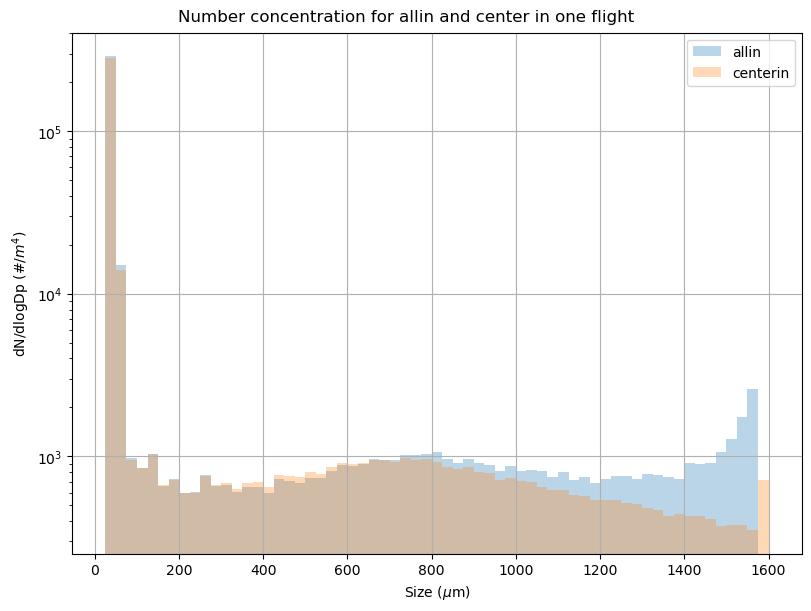

In [28]:
fig, ax = plt.subplots(figsize=(8,6), layout="constrained", sharey=True)

# Northern Marine, Top Layer

# Get the normalized values for plotting (from functions in numb_conc)
ai_part_norm = numb_conc.cip_mean_norm_Nt(ai_ds)
ci_part_norm = numb_conc.cip_mean_norm_Nt(ci_ds)


ax.hist(ai_ds['MIDBINS'], weights=ai_part_norm.values, bins=ai_ds['MIDBINS'], label="allin", histtype='stepfilled', alpha=0.3)
ax.hist(ci_ds['MIDBINS'], weights=ci_part_norm.values, bins=ci_ds['MIDBINS'], label="centerin", histtype='stepfilled', alpha=0.3)

# set labels, titles and legends for subplots
ax.set_ylabel('dN/dlogDp (#/$m^4$)')
ax.set_xlabel('Size ($\mu$m)')
ax.legend(loc='upper right')



#ax.set_xscale('log')  # Set x-axis to log scale
ax.set_yscale('log')  # Set y-axis to log scale
ax.grid(True)


plt.suptitle(f'Number concentration for allin and center in one flight') # title
plt.show()

In [27]:
print('Center-in normalized mean concentrations:')
print(ci_part_norm)
print('----------------')
print('All-in normalized mean concentrations:')
print(ai_part_norm)

Center-in normalized mean concentrations:
<xarray.DataArray 'CONCENTRATION' (Vector64: 64)> Size: 256B
array([281434.34   ,  13979.897  ,    950.387  ,    848.6034 ,
         1036.3317 ,    662.9836 ,    716.75385,    598.0582 ,
          596.8468 ,    758.1356 ,    669.735  ,    687.5267 ,
          627.67786,    682.66174,    692.6782 ,    649.4065 ,
          771.6296 ,    762.1657 ,    747.9672 ,    796.7068 ,
          784.0736 ,    862.87244,    915.6039 ,    896.9409 ,
          906.04517,    953.9336 ,    948.4968 ,    930.1425 ,
          972.8226 ,    956.3092 ,    966.76764,    925.41284,
          857.6063 ,    834.74097,    857.81976,    804.5275 ,
          786.52734,    715.8379 ,    741.33545,    706.54706,
          698.09143,    651.63007,    617.7332 ,    618.1872 ,
          577.07196,    573.0207 ,    537.28394,    540.8509 ,
          542.85443,    517.4841 ,    507.85992,    483.70425,
          465.35416,    428.1766 ,    445.22095,    432.32614,
          427.3

### ASPECT RATIO
The CIP data has mean_aspect ratio per bin

In [43]:
ai_ds['MEAN_ASPECTRATIO'].values.max()

np.float32(0.95000005)

In [45]:
ai_ds

<xarray.Dataset> Size: 4MB
Dimensions:           (time: 2358, Vector64: 64, Vector40: 40)
Coordinates:
  * time              (time) datetime64[ns] 19kB 2022-03-22T11:37:21.440021 ....
    lat               (time) float32 9kB ...
    lon               (time) float32 9kB ...
    alt               (time) float32 9kB ...
Dimensions without coordinates: Vector64, Vector40
Data variables: (12/33)
    base_time         datetime64[ns] 8B ...
    utc_time          (time) float64 19kB ...
    TAS               (time) float32 9kB ...
    MIDBINS           (Vector64) float32 256B 25.0 50.0 ... 1.575e+03 1.6e+03
    ACTIVETIME        (time) float32 9kB ...
    SA                (Vector64) float32 256B 2.208e-06 8.691e-06 ... 0.0 0.0
    ...                ...
    IWC200            (time) float32 9kB ...
    LWC200            (time) float32 9kB ...
    AREA200           (time) float32 9kB ...
    MEAN_AREARATIO    (Vector64, time) float32 604kB ...
    MEAN_ASPECTRATIO  (Vector64, time) float32 604kB 0.95 0.95 0.0 ... 0.0 0.0
    SV_CIP            (Vector64, time) float32 604kB ...
Attributes: (12/62)
    Source:                  SODA-2 OAP Processing Software
    DateCreated:             Mon Mar 11 15:47:38 2024
    FlightDate:              03/22/2022
    DateProcessed:           Mon Feb  5 10:02:39 2024
    TimeInterval:            11:37:21-14:53:46
    FN:                      /home/ninalar/Documents/MC2/2022-islas/as220007/...
    ...                      ...
    keywords_vocabulary:     GCMD Science Keywords
    Conventions:             
    NAV file:                ISLAS_SAFIRE-ATR42_CORE_NAV_1HZ_20220322_as22000...
    SODA NC file:            03222022_113721_CIP.nc
    date_modified:           2025-03-19
    date_metadata_modified:  2025-03-19